## 【問題1】ジニ不純度を求める関数
まずは空間を分割するための指標値、ジニ不純度を計算する関数を作成してください。

まずは簡単な例を作り、手計算と関数の結果を比較してください。

例

クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667
クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480
クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000
この他にもいくつか試してください。

$$
\begin{eqnarray}
I(t) &=& 1 - \sum_{i=1}^{K}P^2(C_i|t)\\
&=& 1 - \sum_{i=1}^{K}\Bigl(\frac{N_{t, i}}{N_{t, all}}\Bigr)^2
\end{eqnarray}
$$

$t$: Index of node<br>
$i$: Index of class<br>
$K$: N of class<br>
$C_i$: $i$-th class<br>
$P^2(C_i|t)$: $C_i$ ratio in $t$-th node<br>
$N_{t, i}$: N of samples in $t$-th node in $i$-th class<br>
$N_{t, all}$: Total samples in $t$-th node

In [315]:
#ジニ不純度を求める関数

def gini_impurity_test(target):
    """
    Parameters
    -----------------
    target: ndarray of shape(n_samples, )
    
    Attributes
    -------------
    classes: ndarray of shape(n_unique_value, )
        unique value set in target
    
    Returns
    -----------------
    impurity
    
    """
    #inpurityの初期値は1 (max)
    impurity = 1.0
    #要素が一つもなければimpurity = 0で返す
    if (len(target) == 0):
        impurity = 0.0
        return impurity
    
    #pandasの場合はnumpy arrayに
    target = np.array(target)
    #sample方向は統一して縦に
    target = target.reshape(-1, 1)
    #targetのユニークな要素を取得
    classes = np.unique(target)
    
    #Impurity = 1 - sigma{(Probabiliry_cls)^2}
    for cls in classes:
        impurity -= ((len(target[target == cls]))/(len(target)))**2
    return impurity

In [316]:
#Inpurity = 1 - {(4/10)^2 + (6/10)^2} = 0.48になるデータセット
a = np.array(
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
)

In [317]:
#手計算
1 - ((4/10)**2 + (6/10)**2)

0.48

In [318]:
#関数で計算
gini_impurity(a)

0.48

## 【問題2】情報利得を求める関数
次に、情報利得(Information Gain)を計算する関数を作成してください。先ほど作成したジニ不純度 を計算する関数を呼び出して使います。


まずは簡単な例を作り、手計算と関数の結果を比較してください。

例

左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30, 右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 → 情報利得0.143

この他にもいくつか試してください。

$$
IG(p) = I(p) - \frac{N_{left, all}}{N_{p, all}}I(left) - \frac{N_{right, all}}{N_{p, all}}
$$

In [320]:
# Information Gain
def info_gain_test(parent, left, right):
    """
    Parameters
    -----------------
    parent: ndarray of shape(n_samples, )
    left: ndarray of shape(n_left_samples, )
    right: ndarray of shape(n_right_samples, )
    
    Returns
    -----------------
    information gain
    impurity of parent, left and right
    
    Note
    -----------------

    """
    #親から見た左の子の比率
    l_ratio = len(left) / len(parent)
    #親から見た右の子の比率
    r_ratio = len(right) / len(parent)
    
    #ジニ不純度を親、左の子、右の子に対して算出
    imp_p = gini_impurity_test(parent)
    imp_l = gini_impurity_test(left)
    imp_r = gini_impurity_test(right)
    
    #information gainを算出
    info_gain =  imp_p - (l_ratio* imp_l + r_ratio* imp_r)
    
    return info_gain, imp_p, imp_l, imp_r

In [321]:
#i=0-9の位置でyを分割した際の不純度を見てみる

In [322]:
ig = np.array([])
imp = np.empty((0, 3))

for i in range(len(a)+1):
    split_a= np.split(a,  [0, i])
    ig_tmp, imp_p, imp_l, imp_r = info_gain_test(a, split_a[1], split_a[2])

    #put into list
    ig = np.append( ig, ig_tmp)
    imp = np.append(imp, [np.array([imp_p, imp_l, imp_r])], axis=0)
    
    print("-----------------------------------------------------")
    print("split position: i=%d" % (i))
    #print("ary1 %s, ary2 %s" % (split_y[1], split_y[2]))
    print("left: %s , right: %s" % (split_a[1], split_a[2]))
    print("Impurity(l): %.3f,  Impurity(r): %.3f" % ( imp[i, 1], imp[i, 2]))
    print("Info gain: %.3f" % (ig[i]))
    

-----------------------------------------------------
split position: i=0
left: [] , right: [0 0 0 0 1 1 1 1 1 1]
Impurity(l): 0.000,  Impurity(r): 0.480
Info gain: 0.000
-----------------------------------------------------
split position: i=1
left: [0] , right: [0 0 0 1 1 1 1 1 1]
Impurity(l): 0.000,  Impurity(r): 0.444
Info gain: 0.080
-----------------------------------------------------
split position: i=2
left: [0 0] , right: [0 0 1 1 1 1 1 1]
Impurity(l): 0.000,  Impurity(r): 0.375
Info gain: 0.180
-----------------------------------------------------
split position: i=3
left: [0 0 0] , right: [0 1 1 1 1 1 1]
Impurity(l): 0.000,  Impurity(r): 0.245
Info gain: 0.309
-----------------------------------------------------
split position: i=4
left: [0 0 0 0] , right: [1 1 1 1 1 1]
Impurity(l): 0.000,  Impurity(r): 0.000
Info gain: 0.480
-----------------------------------------------------
split position: i=5
left: [0 0 0 0 1] , right: [1 1 1 1 1]
Impurity(l): 0.320,  Impurity(r): 0.

Text(0, 0.5, 'Impurity / Informaiton Gain')

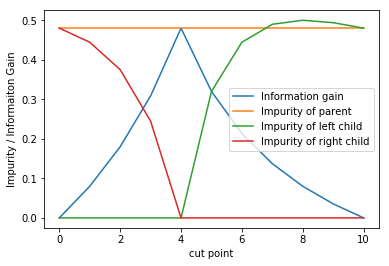

In [323]:
import matplotlib.pyplot as plt
x = list(range(0, len(ig)))

plt.plot(x, ig, label = 'Information gain')
plt.plot(x, imp[:, 0], label = 'Impurity of parent')
plt.plot(x, imp[:, 1], label = 'Impurity of left child')
plt.plot(x, imp[:, 2], label = 'Impurity of right child')

plt.legend()
plt.xlabel('cut point')
plt.ylabel('Impurity / Informaiton Gain')



## 【問題3】深さ1の決定木分類器クラスの作成
深さが1の決定機分類器のクラスを作成し、Sprint2で作成した分類のパイプラインに組み込んでください。

クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchDecesionTreeClassifierとしてください。

メソッドやパラメータなどはscikit-learnを参考にしてください。

sklearn.tree.DecisionTreeClassifier — scikit-learn 0.20.2 documentation

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

深さ1とは空間の分割を1回だけ行うことを指します。

決定木のアルゴリズム

ある特徴量の軸に対して、全てのパターンのしきい値を考え、それぞれの情報利得を計算していきます。各点の値をしきい値にする方法が一般的です。（ただし、実際にはしきい値の数は点の数よりひとつ少なくて良いことになります）分割の全候補の中で最も情報利得が大きくなるものをそのノードの分割方法として採用します。

ジニ不純度が0になるノード、または指定された深さのノードは葉と呼ばれます。葉にはそれぞれ推定時にどのクラスに分類するかを記録しておきます。ジニ不純度が0でない場合は、多数決により分類するクラスを決定します。

ヒント

これまでのスクラッチ課題に比べてアルゴリズムが複雑です。コードを書く前に、フローチャートなどで整理するようにしましょう。

### Irisデータでやってみる

In [374]:
# Thresholdを渡すバージョンのinformation gain
def info_gain_test2(parent, feature, threshold):
    """
    Parameters
    -----------------
    parent: ndarray of shape(n_samples, )
    
    feature: ndarray of shape(n_samples, )
        a feature used as standard to divide parent 
    
    threshold: float
        threshold for feature to split parent
    
    Returns
    -----------------
    information gain
    
    Note
    -----------------
    
    """
    left = parent[feature >= threshold]
    right = parent[feature < threshold]
    
    #親から見た左の子の比率
    l_ratio = len(left) / len(parent)
    #親から見た右の子の比率
    r_ratio = len(right) / len(parent)
    
    #ジニ不純度を親、左の子、右の子に対して算出
    imp_p = gini_impurity_test(parent)
    imp_l = gini_impurity_test(left)
    imp_r = gini_impurity_test(right)
    
    #information gainを算出
    info_gain =  imp_p - (l_ratio* imp_l + r_ratio* imp_r)
    
    return info_gain, imp_p, imp_l, imp_r

In [375]:
#read data

from sklearn.datasets import load_iris
dataset = load_iris()
print(dataset.keys())
print(dataset.target_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']


In [376]:
#split data

import pandas as pd
#import features
X = pd.DataFrame(dataset.data, columns = dataset.feature_names)

#import target value
y = pd.DataFrame(dataset.target, columns = {'species'})
print(X.head())
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   species
0        0
1        0
2        0
3        0
4        0


In [377]:
#concatenate x and y
df = pd.concat((X, y), axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [378]:
#extract only versicolor and virginica
#drop setosa rows(label: 0)

setosa_row = df[df['species'] == 0].index
df = df.drop(setosa_row, axis=0)

In [379]:
from sklearn.model_selection import  train_test_split
#split arrays into two (train, test)
#shuffling is True by default
X_train, X_test, y_train, y_test = train_test_split(np.array(df.iloc[:, :4]), np.array(df.iloc[:, 4]), train_size=3/4)

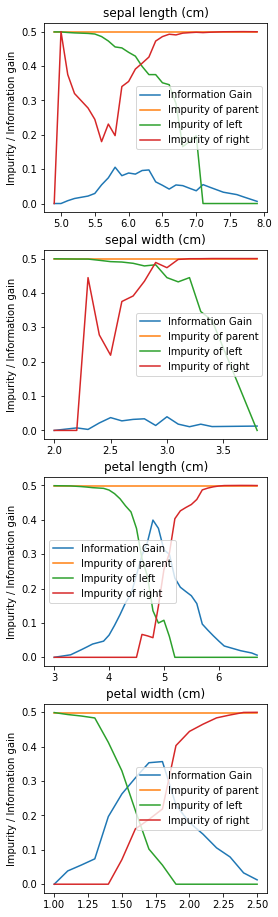

In [380]:
fig, axes = plt.subplots(X_train.shape[1], 1, figsize=(4, 4*X_train.shape[1]))

#各特徴量に関してループ
for clm in range(X_train.shape[1]):
    #information gain格納用のndarray
    ig = np.empty((0, 4))
    
    #特徴量を１つとる
    feature_values = X_train[:, clm]
    #重複を除いて閾値をとる
    thresholds = list(set(feature_values))
    
    #thresholdを昇順に並べる
    thresholds.sort()
    
    #info gainを計算して格納。thresholdごとにループ
    for threshold in thresholds:
        ig = np.append(ig, [np.array(info_gain_test2(y_train, feature_values, threshold))],axis=0);
    
    #グラフのタイトルをセット
    axes[clm].set_title(df.columns[clm])
    
    #info gain、各不純度を描画
    axes[clm].plot(thresholds, ig[:, 0], label='Information Gain')    
    axes[clm].plot(thresholds, ig[:, 1], label='Impurity of parent')
    axes[clm].plot(thresholds, ig[:, 2], label='Impurity of left')
    axes[clm].plot(thresholds, ig[:, 3], label='Impurity of right')
    
    #legendなど体裁を整える
    axes[clm].set_ylabel('Impurity / Information gain')
    axes[clm].legend()


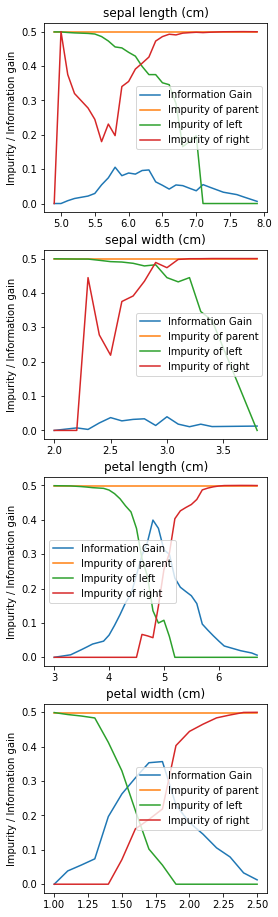

In [381]:
fig, axes = plt.subplots(X_train.shape[1], 1, figsize=(4, 4*X_train.shape[1]))

#各特徴量に関してループ
for clm in range(X_train.shape[1]):
    #information gain格納用のndarray
    ig = np.empty((0, 4))
    
    #特徴量を１つとる
    feature_values = X_train[:, clm]
    #重複を除いて閾値をとる
    thresholds = list(set(feature_values))
    
    #thresholdを昇順に並べる
    thresholds.sort()
    
    #info gainを計算して格納。thresholdごとにループ
    for threshold in thresholds:
        ig = np.append(ig, [np.array(info_gain_test2(y_train, feature_values, threshold))],axis=0);
        
    #グラフのタイトルをセット
    axes[clm].set_title(df.columns[clm])
    
    #info gain、各不純度を描画
    axes[clm].plot(thresholds, ig[:, 0], label='Information Gain')    
    axes[clm].plot(thresholds, ig[:, 1], label='Impurity of parent')
    axes[clm].plot(thresholds, ig[:, 2], label='Impurity of left')
    axes[clm].plot(thresholds, ig[:, 3], label='Impurity of right')
    
    #legendなど体裁を整える
    axes[clm].set_ylabel('Impurity / Information gain')
    axes[clm].legend()


In [441]:
uni =  np.unique(y_train)
print(uni)

print(X_train[:, 1] >= 3)

print(y_train[X_train[:, 1] >= 3])
print(y_train == uni[0])

for ele in uni:
    print(y_train == ele)

[1 2]
[False  True False False False  True False False  True  True  True False
  True  True  True False False  True False  True False False  True  True
  True False False  True  True False False  True False  True False False
  True  True False False  True False False False False False False False
  True  True  True  True False False  True False False  True False  True
  True  True False False  True False  True False  True False False  True
  True  True  True]
[2 2 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 1 1 2 2 2 2 2 1 2 2 2 2 1 1 2 1]
[ True False False  True False False False  True  True  True  True  True
 False False False False False False  True False False  True False False
  True False  True False False  True  True False  True False False  True
 False  True  True  True  True  True  True False  True False False  True
  True  True False False  True  True False  True False False  True False
  True False False  True False  True False  True False False False  True
  True False  True]
[ Tr

In [483]:

class cratchDecesionTreeClassifier():
    
    def __init__(self):
        self.gain = 0.0
        self.feature = None
        self.label = None
        self.feature = None
    
    def fit(self, X, y):
        """
        決定木による分類を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples,)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        """
        #pandasをnpのarrayに
        X = np.array(X)
        y = np.array(y)
        #sample方向は統一して縦に
        target = target.reshape(-1, 1)
        
        #ユニークなラベルを取得
        uni =  np.unique(y_train)
        
        #重複を除いてとる(閾値として利用)
        thresholds = np.unique(X_train)
        thresholds = np.sort(thresholds)
            
        for threshold in thresholds:
            #information gainを算出して格納
            if (self.gain < self._info_gain(y, feature_values, threshold)):
                self.gain = self._info_gain(y, feature_values, threshold)
                self.feature = feature
                
                cnt = (feature_values >= threshold).sum()
                tmp = len(y)
                for ele in uni:
                    if (tmp > abs(cnt - (y != ele).sum)):
                        tmp = abs(cnt - (y != ele).sum)
                        self.label = ele

        return self.gain
    
    def predict(self, X_test):
        """
        決定木を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """

        return pred
    
    def _gini_impurity(self, target):
        """
        Parameters
        -----------------
        target: ndarray of shape(n_samples, )

        Attributes
        -------------
        classes: ndarray of shape(n_unique_value, )
            unique value set in target

        Returns
        -----------------
        impurity

        """
        #inpurityの初期値は1 (max)
        impurity = 1.0
        #要素が一つもなければimpurity = 0で返す
        if (len(target) == 0):
            impurity = 0.0
            return impurity

        #targetのユニークな要素を取得
        classes = np.unique(target)

        #Impurity = 1 - sigma{(Probabiliry_cls)^2}
        for cls in classes:
            impurity -= ((len(target[target == cls]))/(len(target)))**2
        return impurity
    
    # information gain
    def _info_gain(self, parent, feature, threshold):
        """
        Parameters
        -----------------
        parent: ndarray of shape(n_samples, )

        feature: ndarray of shape(n_samples, )
            a feature used as standard to divide parent 

        threshold: float
            threshold for feature to split parent

        Returns
        -----------------
        information gain

        Note
        -----------------

        """
        left = parent[feature >= threshold]
        right = parent[feature < threshold]

        #親から見た左の子の比率
        l_ratio = len(left) / len(parent)
        #親から見た右の子の比率
        r_ratio = len(right) / len(parent)

        #ジニ不純度を親、左の子、右の子に対して算出
        imp_p = gini_impurity_test(parent)
        imp_l = gini_impurity_test(left)
        imp_r = gini_impurity_test(right)

        #information gainを算出
        info_gain =  imp_p - (l_ratio* imp_l + r_ratio* imp_r)

        return info_gain

In [553]:

class Node():
    
    def __init__(self, target, features):
        self.left = None
        self.right = None
        self.threshold = None
        
        self.left_label = None
        self.right_label = None
        
        #impurity
        self.imp = None
        #information gain
        self.gain = None
        

class ScratchDecesionTreeClassifier():
    
    def __init__(self):
        self.gain = None
        self.unique_value = None
        self.feature = np.empty((0, 1))
        self.label = np.empty((0, 1))
        self.gain = np.empty((0, 1))
        self.threshold = np.empty((0, 1))
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        決定木による分類を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        #pandasをnpのarrayに
        X = np.array(X)
        y = np.array(y)
        
        #0, 1以外の２値で入力された場合への対応（例：a, bを0, 1に変換）
        #yの中のユニークな値を重複無しのndarrayに（[a, b, a, a, b, b] を[a, b]に ）
        self.unique_value = np.unique(y)
        #yを0, 1に変換
        #（[a, b, a, a, b, b] がaとなる場合に0(False), bとなる場合に1(True)に ）
        y = (y != self.unique_value[0]).astype(np.int64)  
        
        #特徴量の数
        n_features = X_train.shape[1]
        
        #特徴量の数だけループ
        for feature in range(n_features):
            #特徴量を１つとる
            feature_values = X_train[:, feature]
            #重複を除いてとる(閾値として利用)
            thresholds = np.unique(feature_values)
            thresholds = np.sort(thresholds)
            
            #thresholdの数だけループ
            for threshold in thresholds:
                #information gainとthresholdによって分類されるlabelを出す
                gain_tmp, label_tmp = self._info_gain(y, feature_values, threshold)

                self.gain = np.append(self.gain, gain_tmp)
                self.label = np.append(self.label, label_tmp)
                self.feature = np.append(self.feature, feature)
                self.threshold = np.append(self.threshold, threshold)
                
                """
                # gainのmax値だったら、インスタンス変数に格納
                #その際のfeatureとlabelとthresholdも保管
                if (self.gain < gain_tmp):        
                    self.gain = gain_tmp
                    self.feature = feature
                    self.label = label_tmp
                    self.threshold = threshold
                """
                    
                """
                if (self.gain < self._info_gain(y, feature_values, threshold)):
                    self.gain = self._info_gain(y, feature_values, threshold)
                    self.feature = feature

                    cnt = (feature_values >= threshold).sum()
                    tmp = len(y)
                    for ele in uni:
                        if (tmp > abs(cnt - (y != ele).sum)):
                            tmp = abs(cnt - (y != ele).sum)
                            self.label = ele
                            print(self.label)
                """

        return

    def predict(self, X_test):
        """
        決定木を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        #gainがmaxをとるindex値を格納
        max_gain_idx = clf.gain.argmax()
        
        #分類の基準となるfeatureのみ取り出す
        X_test = X_test[:, self.feature[max_gain_idx].astype(np.int64)]
        
        #threshold以上ならTrueに、未満ならFalseに置き換える
        pred = (X_test >= clf.threshold[max_gain_idx])
        
        #Trueをclf.label[max_gain_idx]に置き換える
        if clf.label[max_gain_idx] == True:
            pred = pred + 0
        else:
            pred = pred + 0
        print(pred)
        #(0, 1)を (a, b)に戻す。
        pred = self.unique_value[pred]
        
        return pred
    
    def _gini_impurity(self, target):
        """
        Parameters
        -----------------
        target: ndarray of shape(n_samples, )

        Attributes
        -------------
        classes: ndarray of shape(n_unique_value, )
            unique value set in target

        Returns
        -----------------
        impurity

        """
        #inpurityの初期値は1 (max)
        impurity = 1.0
        #要素が一つもなければimpurity = 0で返す
        if (len(target) == 0):
            impurity = 0.0
            return impurity

        #sample方向は統一して縦に
        target = target.reshape(-1, 1)
        #targetのユニークな要素を取得
        classes = np.unique(target)

        #Impurity = 1 - sigma{(Probabiliry_cls)^2}
        for cls in classes:
            impurity -= ((len(target[target == cls]))/(len(target)))**2
        return impurity
    
    # information gain
    def _info_gain(self, parent, feature, threshold):
        """
        Parameters
        -----------------
        parent: ndarray of shape(n_samples, )

        feature: ndarray of shape(n_samples, )
            a feature used as standard to divide parent 

        threshold: float
            threshold for feature to split parent

        Returns
        -----------------
        information gain

        Note
        -----------------

        """

        left = parent[feature >= threshold]
        right = parent[feature < threshold]
        

        n_of_samples_over_threshold = (feature >= threshold).sum()
        n_of_samples_label_1 = (parent).sum()

        if n_of_samples_over_threshold >=  n_of_samples_label_1:
            label = True
        else:
            label = False
        
        #親から見た左の子の比率
        l_ratio = len(left) / len(parent)
        #親から見た右の子の比率
        r_ratio = len(right) / len(parent)

        #ジニ不純度を親、左の子、右の子に対して算出
        imp_p = gini_impurity_test(parent)
        imp_l = gini_impurity_test(left)
        imp_r = gini_impurity_test(right)

        #information gainを算出
        info_gain =  imp_p - (l_ratio* imp_l + r_ratio* imp_r)

        return info_gain, label

In [554]:
clf = ScratchDecesionTreeClassifier()
clf.fit(X_train, y_train)

#gainがmaxをとるindex値を格納
max_gain_idx = clf.gain.argmax()
print("lndex of max gain: ", max_gain_idx)
print("max gain: ", clf.gain[max_gain_idx])
print("label: ", clf.label[max_gain_idx])
print("feature: ", clf.feature[max_gain_idx])
print("threshold", clf.threshold[max_gain_idx])

lndex of max gain:  56
max gain:  0.3991713055954089
label:  1.0
feature:  2.0
threshold 4.8


In [557]:

pred = clf.predict(X_test)

print("y_test: ", y_test)
print("pred: ", pred)
pred == y_test

feature:  2.0
[1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1]
y_test:  [2 2 1 1 1 1 1 2 1 1 1 2 2 2 2 1 1 1 1 2 1 1 2 2 2]
pred:  [2 2 1 2 2 1 1 2 1 1 1 2 2 2 2 1 1 2 1 2 1 1 2 2 2]


array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True])

In [507]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [383]:
# scaleしなくてもいい理由

In [9]:
from sklearn.model_selection import  train_test_split
#split arrays into two (train, test)
#shuffling is True by default
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3/4)

/Users/ohmori/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## 【問題4】（アドバンス課題）深さ2の決定木分類器クラスの作成
問題3で作成したクラスを発展させ、深さが2の決定木分類器のクラスを作成してください。

深さ2とは空間の分割を2回行うことを指します。

ヒント

各ノードをインスタンスとして扱うと、任意の深さへの拡張が行いやすくなります。

## 【問題5】（アドバンス課題）任意の深さに対応できる決定木分類器クラスの作成
問題3,4で作成したクラスを発展させ、任意の深さに対応できる決定木分類器のクラスを作成してください。深さを特定の値で指定せず、全ての葉がジニ不純度0となるまで続けられるようにしてください。

## 【問題6】指標値の算出
分類に関する指標値で精度を確認してください。

## 【問題7】決定領域の可視化
2値分類のデータセットに対して決定領域を可視化してください。

## 【問題8】決定木の利用場面
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。

決定木が他の手法に比べて有効だと考えられるのはどういった場面